# TVB only (multiscale) simulation

## tvb-multiscale toolbox:

### https://github.com/the-virtual-brain/tvb-multiscale

For questions use the git issue tracker, or write an e-mail to me: dionysios.perdikis@charite.de

## Reduced Wong-Wang mean field model with 1 Excitatory and 1 Inhibitory population

For every region node $n\prime$ modelled as a mean-field node in TVB:

(Post)Synaptic gating dynamics (i.e., proportion of synapse channels open at any given time):

$\dot{S_{n\prime}}^{(E)} = - \frac{1}{\tau_E}{S_{n\prime}}^{(E)}(t) + (1-{S_{n\prime}}^{(E)}(t))\gamma_{E} {r_{n\prime}}^{(E)}(t)$

$\dot{S_{n\prime}}^{(I)} = - \frac{1}{\tau_I}{S_{n\prime}}^{(I)}(t) + \gamma_I{r_{n\prime}}^{(I)}(t)$

where we bound ${S_{n\prime}}^{(E/I)}(t) \in $ [0.0, 1.0], 

and $ {r_{n\prime}}^{(E/I)}(t) $ is the postsynaptic firing rate given by:

$ {r_{n\prime}}^{(E/I)}(t) = H({I_{syn_{n\prime}}}^{(E/I)}(t), a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) $

where

$ H({I_{syn_{n\prime}}}^{(E/I)}(t),  a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) = \frac{a_{(E/I)}{I_{syn_{n\prime}}}^{(E/I)}(t)-b_{(E/I)}}{1-e^{-d_{(E/I)}(a_{(E/I)}{I_{syn_{n\prime}}}^{(E/I)}(t)-b_{(E/I)})}}$ 

is a sigmoidal activation function of the input presynaptic current.

The total input presynaptic current to excitatory populations is given by: 

$ {I_{syn_{n\prime}}}^{(E)}(t) = W_EI_o + w_+J_{NMDA}{S_{n\prime}}^{(E)}(t) - J_{{n\prime}}{S_{n\prime}}^{(I)}(t) + GJ_{NMDA}\sum_{{m\prime}\neq {n\prime}}C_{{m\prime}{n\prime}}S_{m\prime}^{(E)}(t-\tau_{{m\prime}{n\prime}})$

and to inhibitory ones:

$ {I_{syn_{n\prime}}}^{(I)}(t) = W_II_o + J_{NMDA}{S_{n\prime}}^{(E)}(t) - {S_{n\prime}}^{(I)}(t) +  \lambda GJ_{NMDA}\sum_{{m\prime}\neq {n\prime}}C_{{m\prime}{n\prime}}S_{m\prime}^{(E)}(t-\tau_{{m\prime}{n\prime}})$

where 
$\lambda  \in$[0, 1] for scaling feedforward inhibition.

TVB connectivity weights $C_{{m\prime}{n\prime}}$ are scaled per "region"

## Reduced Wong-Wang mean field model

## Parameters following Ponce-Alvarez et al 2014:

- structural TVB connectivity weights $C_{{m\prime}{n\prime}}$ (${m\prime}->{n\prime}$)
- structural TVB connectivity delays $\tau_{{m\prime}{n\prime}}$  (${m\prime}->{n\prime}$)
- global structural brain connectivity coupling constant $G$
- overall effective external input current $I_o = 0.382nA$ 
- excitatory synaptic coupling $J_{NDMA} = 0.15nA$ 
- local feedback inhibitory synaptic coupling $J_{i} = 1.0nA$ 
- local excitatory recurrence $w_+ = 1.4$
- excitatory kinetic parameter $\gamma_E = 0.641 s$
- inhibitory kinetic parameter $\gamma_I = 1.0 s$
- excitatory (NMDA) time constant $\tau_E = \tau_{NMDA}=100ms$ 
- inhibitory (GABA) time constant $\tau_I = \tau_{GABA}=10ms$ 
- excitatory pool scaling constant $W_E = 1.0$
- inhibitory pool scaling constant $W_I = 0.7$
- excitatory sigmoidal functions parameters $a_{E} = 310nC^{-1}$, $b_{E} = 125Hz$, $d_{E} = 0.16s$
- inhibitory sigmoidal functions parameters $a_{I} = 615nC^{-1}$, $b_{I} = 177Hz$, $d_{I} = 0.087s$
- $\lambda \in [0.0, 1.0]$, allowing for feedforward inhibition


## Reduced Wong-Wang mean field model with 1 Excitatory only population

This model is identical to the previous one but without the inhibitory population and with different parameters given in the Deco et al. 2013 paper.

## Parameters following Deco et al 2013:

- structural TVB connectivity weights $C_{{m\prime}{n\prime}}$ (${m\prime}->{n\prime}$)
- structural TVB connectivity delays $\tau_{{m\prime}{n\prime}}$  (${m\prime}->{n\prime}$)
- global structural brain connectivity coupling constant $G$
- overall effective external input current $I_o = 0.3nA$ 
- excitatory synaptic coupling $J_{NDMA} = 0.2609nA$ 
- local feedback inhibitory synaptic coupling $J_{i} = 1.0nA$ 
- local excitatory recurrence $w_+ = 0.9$
- excitatory kinetic parameter $\gamma = 0.641 s$
- excitatory (NMDA) time constant $\tau = \tau_{NMDA}=100ms$ 
- excitatory sigmoidal functions parameters $a = 270nC^{-1}$, $b = 108Hz$, $d_{E} = 0.154s$

## Spiking network model in TVB

For every neuron $i$ in region node $n$ modelled in TVB as a spiking network:


$ {C_m}_{E/I}{\dot{V}_{ni}}^m = - {I_{ni}}^L(t) - {I_{ni}}^{AMPA}(t) - {I_{ni}}^{NMDA}(t) - {I_{ni} ^{GABA}}(t)- {I_{ni}}^{AMPA,ext}(t)-G\sum_{n\prime n}C_{n\prime \neq n}{I_{n\prime n,i}}^{dc}(t-\tau_{n\prime n}) +{I_{ni}}^{ext}(t) $

$\;\;\;\;\;\;\;\;\;\;=-{g_m}_{E/I}({V_{ni}}^m(t) - V_L) $
              
$\;\;\;\;\;\;\;\;\;\;\;-{g_{AMPA}}_{E/I}({V_{ni}}^m(t) - V_E)\sum_{j=1}^{N_{n,E}}{w_{n,ij}{s_{nj}}^{AMPA}(t)} $

$\;\;\;\;\;\;\;\;\;\;\;-\frac{{g_{NMDA}}_{E/I}({V_{ni}}^m(t) - V_E)}{1+\lambda_{NMDA}e^{-\beta{V_{ni}}^m(t)}}\sum_{j=1}^{N_{n,E}}{w_{n,ij}{s_{nj}}^{NMDA}(t)} $

$\;\;\;\;\;\;\;\;\;\;\;-{g_{GABA}}_{E/I}({V_{ni}}^m(t) - V_I)\sum_{j=1}^{N_{n,I}}{w_{n,ij}{s_{nj}}^{GABA}(t)} $

$\;\;\;\;\;\;\;\;\;\;\;-{g_{AMPA,ext}}_{E/I}({V_{ni}}^m(t) - V_E)G_{E/I}\sum_{n\prime n}{C_{n\prime n}\sum_{j=1}^{N_{n\prime n,E}}{{w_{n\prime n,ij}{s_{n\prime j}}^{AMPA,ext}(t-\tau_{n\prime n})}}} $

$\;\;\;\;\;\;\;\;\;\;\;+{I_{ni}}^{ext}(t) $

$ {\dot{s}_{n,i \in E/I}}^{AMPA/GABA} = -\frac{1}{\tau_{AMPA/GABA}}{s_{n,i \in E/I}}^{AMPA/GABA}(t) +  \sum_k \delta(t-{t_{n,i \in E/I}}^k)$

$ {\dot{x}_{n,i \in E}}^{NMDA} = -\frac{1}{\tau_{NMDA,rise}}{x_{n,i \in E}}^{NMDA}(t) +  \sum_k \delta(t-{t_{n,i \in E}}^k)$

$ {\dot{s}_{n,i \in E}}^{NMDA} = -\frac{1}{\tau_{NMDA,decay}}{s_{n,i \in E}}^{NMDA}(t) + \alpha {x_{n,i \in E}}^{NMDA}(t) (1 - {s_{n,i \in E}}^{NMDA}(t)) $

$ {\dot{s}_{n\prime n,i \in E}}^{AMPA,ext} = -\frac{1}{\tau_{AMPA}}{s_{n\prime n,i \in E}}^{AMPA,ext}(t) + \sum_k \delta(t-{t_{n\prime n, i \in E}}^k) $

Where 

generally

$ w_{i \in E, j \in E} = w+ $

$ w_{i \in I, j \in E} = J_i $

and the global structural brain connectivity coupling constant G:

$G_{I} = \lambda * G_{E}, \lambda \in [0.0, 1.0]$

for feedforward inhibition.

Boundaries:

$ {s_{n,exc/inh}}^{AMPA/NMDA/GABA/AMPA,ext}(t) \in [0.0, 1.0]$


When $V_m(t) > V_{thr}$, emit a spike and clamp $V_m(t)$ to $V_{reset}$ for ${\tau_{ref}}_{E/I}$ ms.


## Parameters following Ponce-Alvarez et al 2014 (Deco et al. 2013):

- structural TVB connectivity weights $C_{{n\prime},n}$ (${n\prime}->n$)
- structural TVB connectivity delays $\tau_{{n\prime},n}$  (${n\prime}->n$)
- leak membrane potential $ V_L = -70 mV $
- threshold membrane potential $ V_{thr} = -50mV $
- reset membrane potential $ V_{reset} = -55mV $
- AMPA time constant $ \tau_{AMPA} = 2ms $
- GABA time constant $\tau_{GABA}=10ms$ 
- NMDA rise time constant $ \tau_{NMDA,rise}=2ms$ 
- NMDA decay time constant $ \tau_{NMDA,decay}=100ms$
- NMDA synapse sigmoidal parameters: $\alpha = 0.5 kHz, \beta = 0.062, \lambda_{NMDA} = 0.28$
- Excitatory/Inhibitory refractory time ${\tau_{ref}}_{E/I} = 2/1ms$
- Excitatory/Inhibitory reversal potential $V_{E/I} = 0 /-70mV$
- Excitatory/Inhibitory membrane capacitance $ {C_m}_{E/I} = 0.5/0.2nF $
- Excitatory/Inhibitory membrane conductance $ {g_m}_{E/I} = 25/20nS $
- Excitatory/Inhibitory AMPA,ext membrane conductance $ {g_{AMPA,ext}}_{E/I} = 3.37/2.59 (2.496/1.944) nS$
- Excitatory/Inhibitory AMPA membrane conductance $ {g_{AMPA}}_{E/I} = 0.065/0.051 (0.104/0.081) nS $
- Excitatory/Inhibitory GABA membrane conductance $ {g_{GABA}}_{E/I} = 10.94/8.51 (4.375/3.4055) nS $
- Excitatory/Inhibitory NMDA membrane conductance $ {g_{NMDA}}_{E/I} = 0.20/0.16 (0.327/0.258) nS $
- local feedback inhibitory synaptic weight $J_{i} = 1.0$ 
- local excitatory synaptic recurrent weight $w+ = 1.55$
- local excitatory to inhibitory synaptic weight $ w_{i \in E, j \in I} = 1.0 $
- local inhibitory synaptic recurrent weight $ w_{i \in I, j \in I} = 1.0 $


In [1]:
model = "ReducedWongWangExcIO"

In [2]:
import os
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_multiscale.core.config import Config, CONFIGURED

work_path = os.getcwd()
data_path = os.path.join(work_path.split("tvb_nest")[0], "data")
outputs_path = os.path.join(work_path, "outputs/SpikingWongWangExcIOInhI")
config = Config(output_base=outputs_path)

config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'

from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config)

try:
    from tvb_multiscale.core.tvb.io.h5_writer import H5Writer
    writer = H5Writer()
except:
    writer = None
    
# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

## 1. Prepare TVB simulator <br> (including structural data -minimally a TVB connectivity, region mean field model, integrator, monitors etc)

2021-12-13 09:36:48,363 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Region simulation with 68 ROI nodes
2021-12-13 09:36:48,366 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Memory requirement estimate: simulation will need about 2.2 MB
2021-12-13 09:36:48,367 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Preparing initial history of shape (880, 2, 68, 1) using model.initial()
2021-12-13 09:36:48,389 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Final initial history shape is (880, 2, 68, 1)
2021-12-13 09:36:48,390 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - initial state has shape (2, 68, 1)
2021-12-13 09:36:48,393 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Memory requirement census: simulation will need about 1.0 MB


(<Figure size 1440x1080 with 2 Axes>,
 <AxesSubplot:title={'center':'Connectivity'}>,
 <Figure size 1440x1080 with 2 Axes>,
 <AxesSubplot:title={'center':"Tracts' lengths"}>)

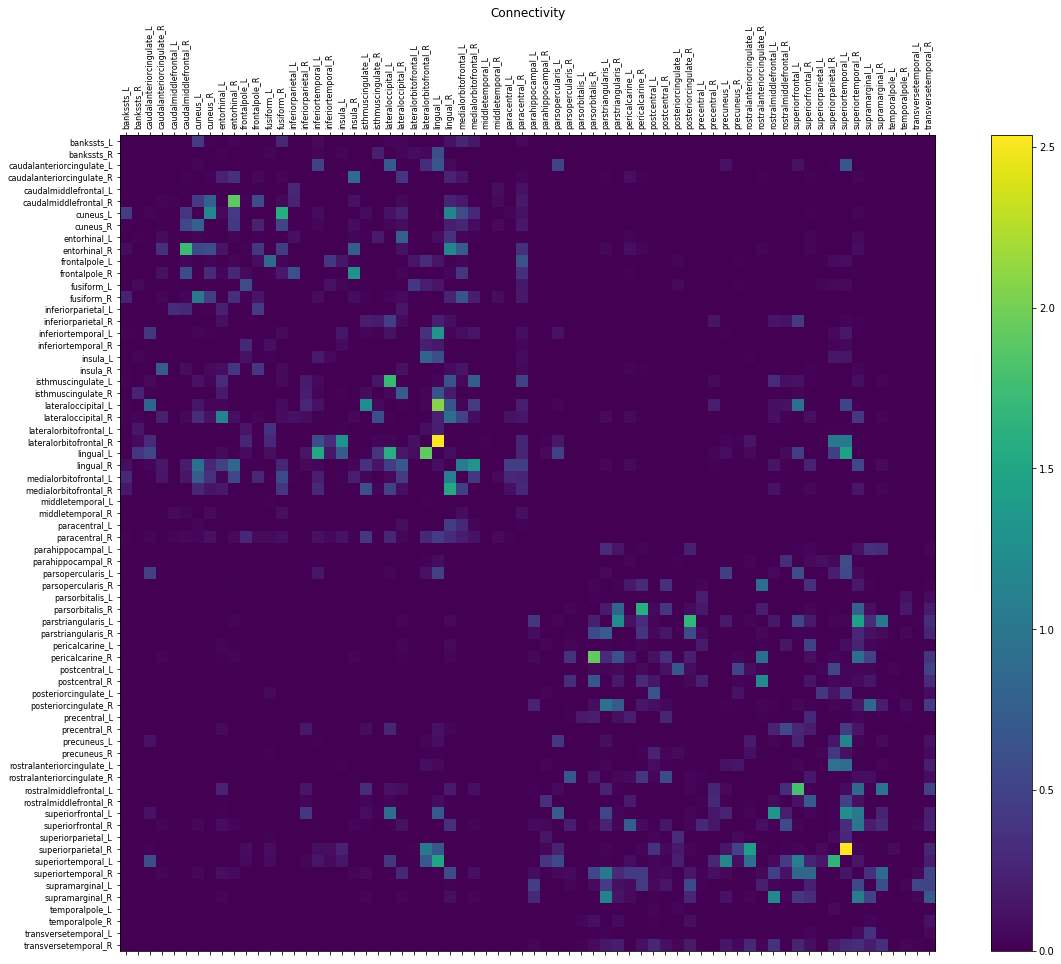

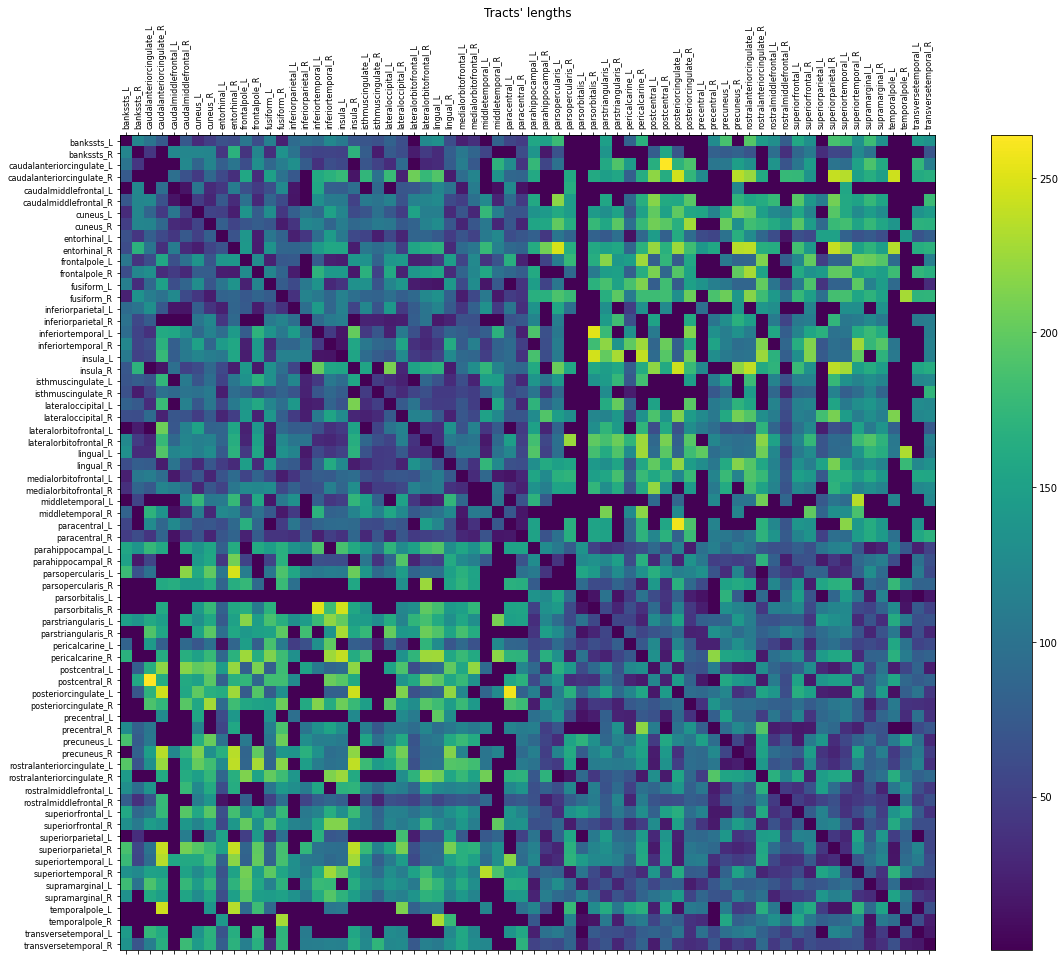

In [3]:
from tvb_multiscale.core.tvb.cosimulator.cosimulator_builder import CoSimulatorBuilder
from tvb.datatypes.connectivity import Connectivity
from tvb_multiscale.core.tvb.cosimulator.models.reduced_wong_wang_exc_io import ReducedWongWangExcIO
from tvb_multiscale.core.tvb.cosimulator.models.reduced_wong_wang_exc_io_inh_i import ReducedWongWangExcIOInhI
from tvb_multiscale.core.tvb.cosimulator.models.spiking_wong_wang_exc_io_inh_i import SpikingWongWangExcIOInhI

# Using the tvb-multdiscale simulator builder with default choices...
simulator_builder = CoSimulatorBuilder()
# Optionally modify the default configuration:
if model == 'SpikingWongWangExcIOInhI':
    simulator_builder.model = SpikingWongWangExcIOInhI()
    populations = ["E", "I"]
    populations_sizes = [16, 4]
    model_params = {
        "N_E": np.array([populations_sizes[0], ]),
        "N_I": np.array([populations_sizes[1], ]),
        "G":   np.array([200.0,])  # G / N_E to normalize for the order of the spiking networks
    }
else:
    model_params = {
    "G":   np.array([20.0,])  # G / N_E to normalize for the order of the spiking networks
                    }
    if model == 'ReducedWongWangExcIO':
        simulator_builder.model = ReducedWongWangExcIO()
        tvb_rates_svs = ["R"]
    elif model == 'ReducedWongWangExcIOInhI':
        simulator_builder.model = ReducedWongWangExcIOInhI()
        tvb_rates_svs = ["R_e", "R_i"]


simulator_builder.connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)

simulator = simulator_builder.build(**model_params)

simulation_length=100.0
if isinstance(simulator.model, SpikingWongWangExcIOInhI):
    from tvb_multiscale.tvb_elephant.spike_stimulus_builder import SpikeStimulusBuilder

    spiking_regions_inds = list(range(simulator.connectivity.number_of_regions))
    # Some code only for SpikingWongWangExcIOInhI 
    from tvb.simulator.integrators import Dop853Stochastic
    simulator.integrator = Dop853Stochastic()
    simulator.integrator.dt = 0.025
    simulator.integrator.noise.nsig = np.array(simulator.model.nvar * [simulator.integrator.noise.nsig[0]])
    # No noise for t_ref and derived variables
    simulator.integrator.noise.nsig[6:] = 0.0  
    time_length = int(np.ceil(simulation_length / simulator.integrator.dt)) + 1
    stb = SpikeStimulusBuilder(targets=["spikes_ext"], rate=2400.0, A=None,  # A=None for uncorrelated spikes
                               number_of_neurons=20, number_of_regions=len(spiking_regions_inds), 
                               target_regions=spiking_regions_inds,
                               t_start=0.0, dt=simulator.integrator.dt, time_length=time_length, sparse=False)
    simulator.spike_stimulus = stb.build_compound_poisson_process()
    
else:
    spiking_regions_inds = []
    # No noise for derived R_e, R_i of ReducedWongWangExcIOInhI
    simulator.integrator.noise.nsig[2:] = 0.0  

plotter.plot_tvb_connectivity(simulator.connectivity)

## 2. Configure simulator, simulate, gather results

In [4]:
# Configure the simulator interface...
simulator.configure()
# ...and simulate!
t = time.time()
results = simulator.run(simulation_length=simulation_length)
print("\nSimulated in %f secs!" % (time.time() - t))

2021-12-13 09:36:57,229 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Region simulation with 68 ROI nodes
2021-12-13 09:36:57,231 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Memory requirement estimate: simulation will need about 2.2 MB
2021-12-13 09:36:57,234 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Preparing initial history of shape (880, 2, 68, 1) using model.initial()
2021-12-13 09:36:57,266 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Final initial history shape is (880, 2, 68, 1)
2021-12-13 09:36:57,268 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - initial state has shape (2, 68, 1)
2021-12-13 09:36:57,271 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Memory requirement census: simulation will need about 1.0 MB
2021-12-13 09:36:57,273 - INFO - tvb_multiscale.core.tvb.cosimulator.cosimulator - Simulation runtime should be about 0.894 seconds
2021-12-13 09:36:57,275 - INFO - tvb_multiscale.core.tv

In [6]:
# Gather the results
t = results[0][0]
source = results[0][1]

# Put the results in a Timeseries instance
from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeriesRegion

source_ts = TimeSeriesRegion(source, time=t,
               connectivity=simulator.connectivity,
               labels_ordering=["Time", "State Variable", "Region", "Neurons"],
               labels_dimensions=
                    {"State Variable": simulator.model.state_variables,
                     "Region": simulator.connectivity.region_labels.tolist()},
               sample_period=simulator.integrator.dt)
source_ts.configure()

if writer is not None:
    writer.write_tvb_to_h5(source_ts, os.path.join(config.out.FOLDER_RES, source_ts.title.replace(" ", "_") + ".h5"))

source_ts 


,value
Dimensions,"['Time', 'State Variable', 'Region', 'Neurons']"
Length,1000
Region Mapping,None
Region Mapping Volume,None
Sample period,0.1
Source Connectivity,Connectivity gid: 86455ec7-46ae-4b19-b448-4a1f6a038844
Time units,ms
Time-series name,Region Time Series
Time-series type,TimeSeriesRegion
"[min, median, max]","[0, 0.92381, 66.8215]"


In [8]:
# Separate mean field time series into different populations
from pandas import Series

if len(spiking_regions_inds) > 0:
    from tvb_multiscale.core.utils.computations_utils import compute_tvb_spike_rate_corrs, \
        tvb_spikes_per_population, tvb_spike_rates_from_TVB_spike_ts, tvb_mean_field_per_population

    mean_field = tvb_mean_field_per_population(source_ts, populations, populations_sizes)

    tvb_spikes = tvb_spikes_per_population(source_ts.get_state_variables(
                                               "spikes").get_subspace_by_index(spiking_regions_inds), 
                                           populations, populations_sizes)

    T = np.maximum(np.minimum(100.0, 1000*simulation_length/10), 10.0)
    std = T/3
    tvb_rates = \
            tvb_spike_rates_from_TVB_spike_ts(tvb_spikes, simulator.integrator.dt, populations_sizes,
                                              sampling_period=simulator.monitors[0].period, window_time_length=T,
                                              kernel="gaussian", std=std)
    tvb_rates.title = "Region mean field spike rate time series"

    if writer is not None:
        writer.write_object(tvb_spikes.to_dict(), path=os.path.join(config.out.FOLDER_RES, "TVB_Spikes") + ".h5")

else:
    from tvb_multiscale.core.utils.computations_utils import compute_tvb_spike_rate_corrs
    mean_field = source_ts
    tvb_rates = source_ts[:, tvb_rates_svs]
    tvb_rates.title = "Region mean field rate time series"
    tvb_spikes = None
    
tvb_corrs = compute_tvb_spike_rate_corrs(tvb_rates)
if writer is not None:
    writer.write_tvb_to_h5(tvb_rates, os.path.join(config.out.FOLDER_RES, tvb_rates.title.replace(" ", "_")) + ".h5",
                           recursive=False)
    writer.write_object(tvb_corrs, path=os.path.join(config.out.FOLDER_RES, "TVB_corrs") + ".h5")


/home/docker/env/neurosci/lib/python3.9/site-packages/xarray/plot/facetgrid.py:394: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/home/docker/packages/tvb-root/tvb_contrib/tvb/contrib/scripts/datatypes/time_series_xarray.py:868: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  pyplot.gcf().canvas.set_window_title(figname)
/home/docker/packages/tvb-root/tvb_contrib/tvb/contrib/scripts/datatypes/time_series_xarray.py:869: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  pyplot.gcf().tight_layout()
/home/docker/env/neurosci/lib/python3.9/site-packages/xarray/plot/facetgrid.py:394: UserWarning: Tight layout not applied. tight_layout cannot make axes height 

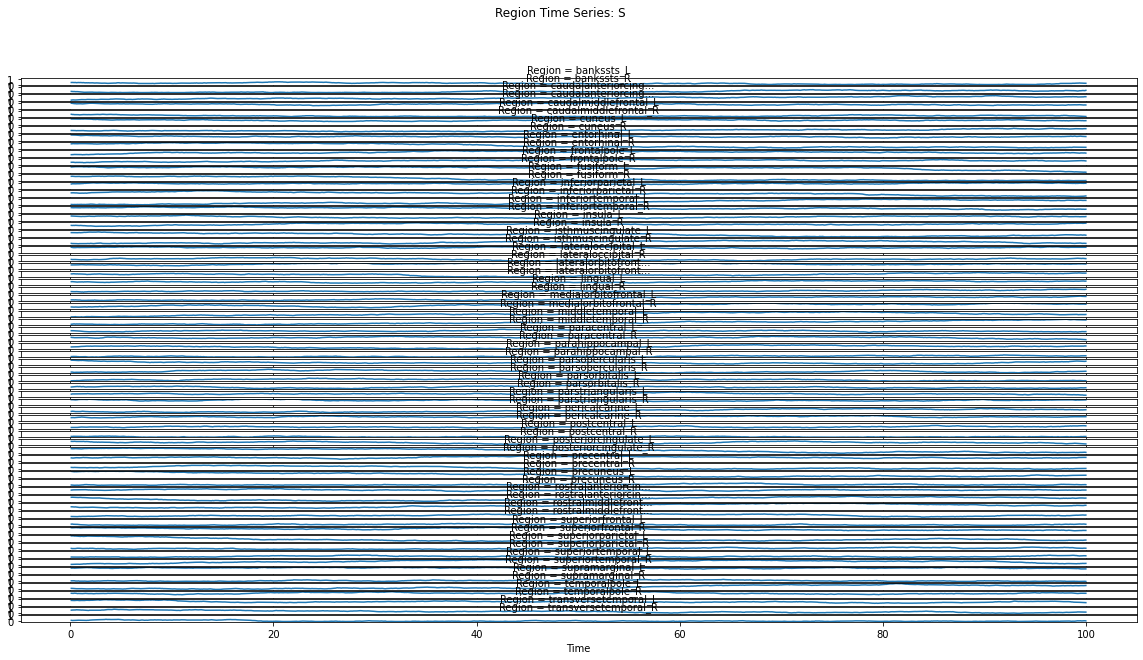

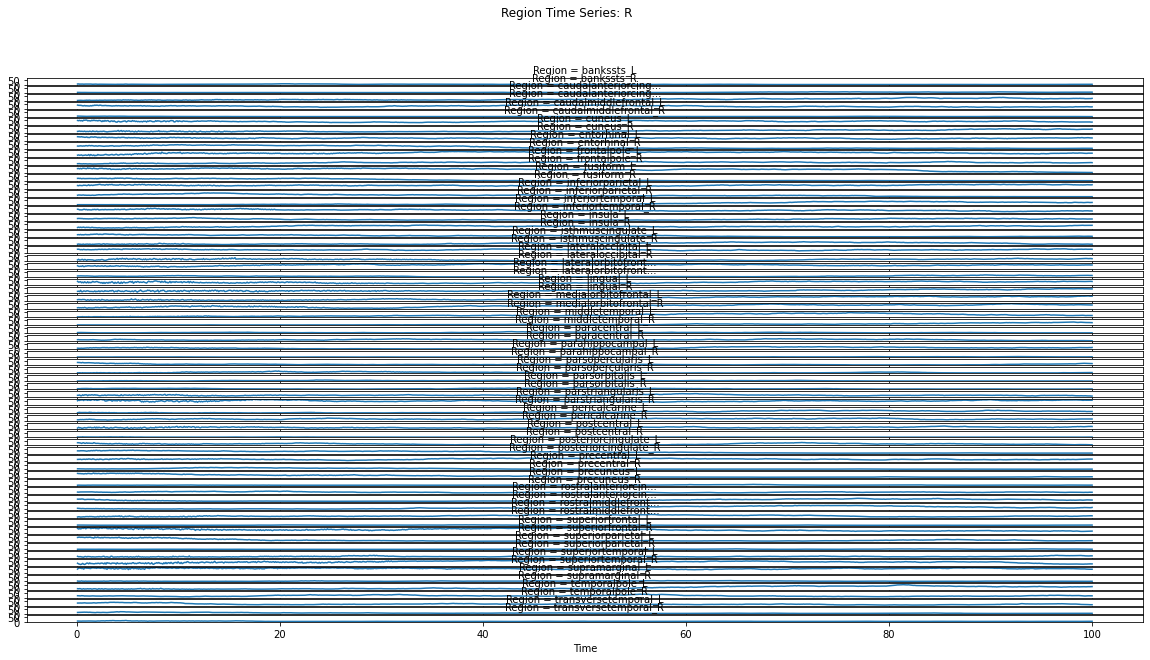

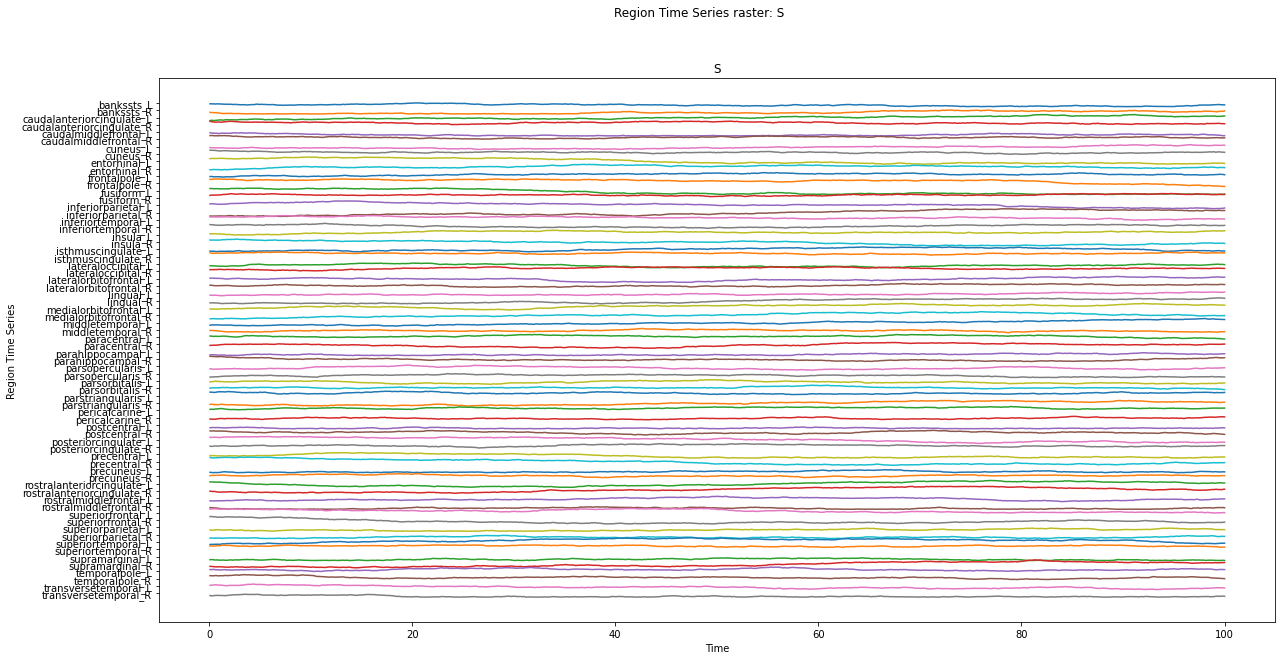

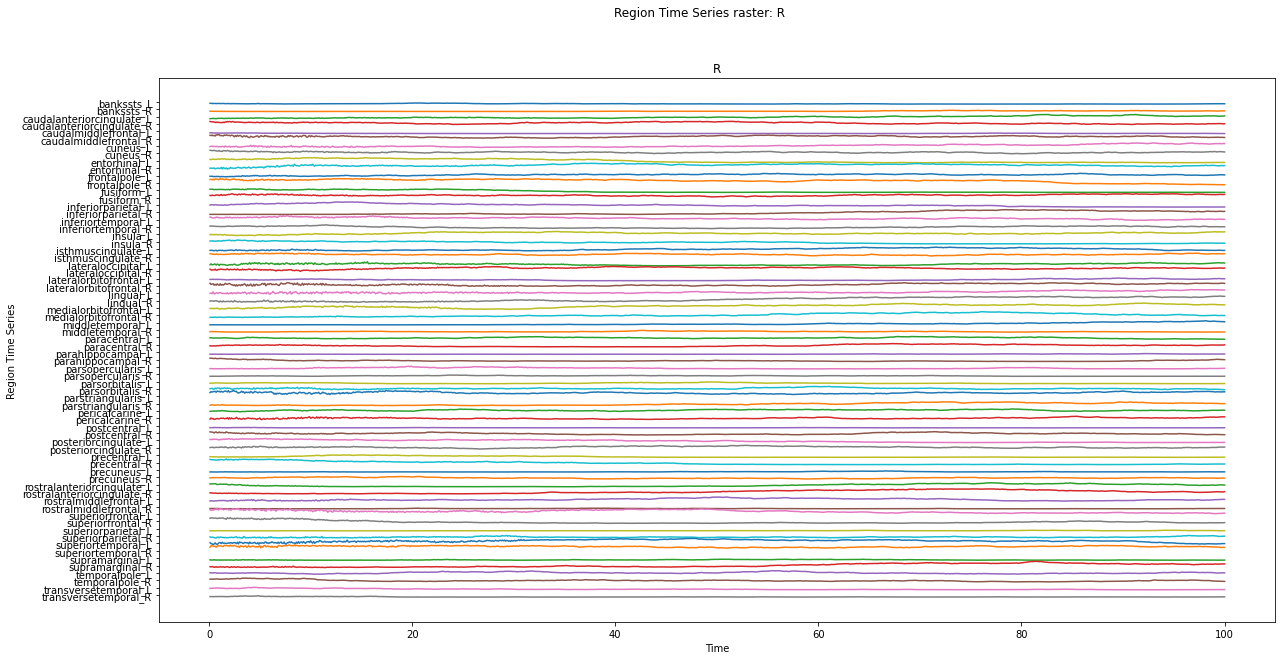

In [9]:
# For raster plot:
mean_field.plot_timeseries(plotter_config=plotter.config, per_variable=True, 
                           figsize=config.figures.NOTEBOOK_SIZE, add_legend=False)
if mean_field.number_of_labels > 9:
    mean_field.plot_raster(plotter_config=plotter.config, per_variable=True, 
                           figsize=config.figures.NOTEBOOK_SIZE, add_legend=False)

### Interactive time series plot

In [10]:
# # ...interactively as well
# # For interactive plotting:
# %matplotlib notebook 
# plotter.plot_timeseries_interactive(source_ts)

In [11]:
%matplotlib inline 

### Plot spikes' raster and mean spike rate for spiking regions

In [12]:
# Plot spikes and mean field spike rates
if tvb_spikes is not None:
    plotter.plot_spikes(tvb_spikes, rates=tvb_rates, title='Population spikes and mean spike rate')

### Plotting spiking network activity using xarray

In [13]:
if len(spiking_regions_inds) > 0:
    from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeries

    if len(spiking_regions_inds) < simulator.connectivity.number_of_regions:
        mean_field_sp = mean_field.get_subspace(spiking_regions_inds)
        mean_field_sp.name = "Spiking regions mean field time series"
        print(mean_field_sp)
        mean_field_sp.plot_timeseries(plotter_config=plotter.config, per_variable=True, figsize=(10, 5))
        
    tvb_rates.plot_timeseries(plotter_config=plotter.config, figsize=(10, 5))
    
    for i_pop, spike in enumerate(tvb_spikes):
        spike.plot(y=spike._data.dims[3], row=spike._data.dims[2],
                   robust=True, figsize=(20, 10), plotter_config=plotter.config)

# References

1 Paula Sanz Leon, Stuart A. Knock, M. Marmaduke Woodman, Lia Domide, <br>
  Jochen Mersmann, Anthony R. McIntosh, Viktor Jirsa (2013) <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling  <br>
  and multimodal neuroimaging. Brain Connectivity 3:121–145. <br>
   
3 Deco Gustavo, Ponce-Alvarez Adrian, Patric Hagmann, <br>
  Gian Luca Romani, Dante Mantini,and Maurizio Corbetta. <br>
  How local Excitation-Inhibition Ratio Impacts the Whole Brain Dynamics <br>
  The Journal of Neuroscience 34(23), 7886-7898, 2014.<br>
  
4 Deco Gustavo, Ponce-Alvarez Adrian, Dante Mantini,<br>
  Gian Luca Romani, Patric Hagmann, and Maurizio Corbetta. <br>
  How local Excitation-Inhibition Ratio Impacts the Whole Brain Dynamics <br>
  The Journal of Neuroscience 33(27), 11239-11252, 2013.<br>

5 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>